In [1]:
# we will build 2 model 1 is tree based xgboost and other is liner regression

In [2]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


In [3]:
def evaluation_metrics(y_test, y_pred):
  """
  function to evaluate the model
  """
  
  r2 = round(r2_score(y_test, y_pred), 2)
  print("R2 on test data:" ,r2)

  MSE  = round(mean_squared_error(y_test, y_pred), 2)
  print("MSE :" , MSE)

  RMSE = round(np.sqrt(MSE), 2)
  print("RMSE :" ,RMSE)

  MAE = round(mean_absolute_error(y_test, y_pred), 2) 
  print("MAE :" ,MAE)

  MAPE = round(mean_absolute_percentage_error(y_test, y_pred), 2)
  print("MAPE :" ,MAPE)
  

# linear rgression

## Feature selection

In [4]:
X_train = pd.read_csv('Engineered_data/xtrain.csv')
X_test = pd.read_csv('Engineered_data/xtest.csv')
y_train = pd.read_csv('Engineered_data/ytrain.csv')
y_test = pd.read_csv('Engineered_data/ytest.csv')

In [5]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.333333,0.75,0.521833,0.0,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,0.0,0.666667,0.750,0.514706,0.327869,0.0,0.0,0.8,0.8,0.333333,0.0,0.666667,0.50,0.50,0.666667,0.666667,0.000000,0.4,0.039511,0.0,0.0,0.339897,0.166448,1.0,0.75,1.0,1.000000,0.422489,0.502179,0.0,0.643070,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.8,0.75,0.654206,1.0,0.25,0.126939,0.25,0.50,1.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.429425,0.0,1.0,1.0,1.000000,0.333333,1.0,0.25,0.0,0.681818,0.4,1.0,0.75,0.6,0.666667,0.500,0.058824,0.131148,0.0,0.0,0.9,0.9,0.333333,0.0,0.666667,0.50,1.00,0.666667,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.604880,0.231260,1.0,1.00,1.0,1.000000,0.550351,0.000000,0.0,0.514455,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.333333,1.0,0.000000,0.0,0.75,0.074766,0.5,0.50,0.426657,0.50,0.50,1.0,0.000000,0.060329,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0
2,0.500000,0.75,0.388581,0.0,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.681818,0.4,1.0,0.75,0.2,0.444444,0.875,0.272059,0.114754,0.0,0.0,0.2,0.5,0.333333,0.0,0.333333,0.75,0.50,0.666667,0.666667,0.666667,1.0,0.116938,0.0,0.0,0.046233,0.125696,1.0,0.75,1.0,1.000000,0.315102,0.000000,0.0,0.294550,0.000000,0.5,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,0.0,0.25,0.327103,1.0,0.25,0.279267,0.50,0.50,1.0,0.224037,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.272727,0.666667,0.75,0.0,0.0,0.0
3,0.000000,0.75,0.282098,0.0,1.0,0.0,0.000000,0.333333,1.0,0.25,0.0,0.181818,0.4,1.0,0.75,0.6,0.222222,0.250,0.691176,0.967213,0.0,0.0,0.5,0.2,0.333333,0.0,0.333333,0.50,0.25,0.333333,0.666667,0.000000,0.6,0.007264,0.0,0.0,0.352312,0.141408,1.0,0.50,0.0,0.333333,0.359675,0.000000,0.0,0.336216,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,0.0,0.75,0.275019,0.0,0.00,0.000000,0.50,0.50,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.727273,0.666667,0.75,0.0,0.0,1.0
4,0.000000,0.75,0.495064,0.0,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,0.6,0.333333,0.500,0.617647,0.934426,0.0,0.0,0.4,0.3,0.333333,0.0,0.333333,0.50,0.25,0.000000,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.299658,0.114566,1.0,1.00,1.0,1.000000,0.477632,0.000000,0.0,0.446478,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.000000,0.250000,1.0,0.333333,0.8,0.25,0.785047,0.0,0.25,0.177715,0.50,0.25,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [6]:
sel_ = SelectFromModel(Lasso(alpha=0.003, random_state=0))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.003, random_state=0))

In [7]:
selected_feats = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 81
selected features: 27
features with coefficients shrank to zero: 54


In [8]:
X_train_lin = X_train[selected_feats]
X_test_lin = X_test[selected_feats]

In [9]:
# Simple linear regression
reg = LinearRegression().fit(X_train_lin, y_train)
y_pred = reg.predict(X_test_lin)

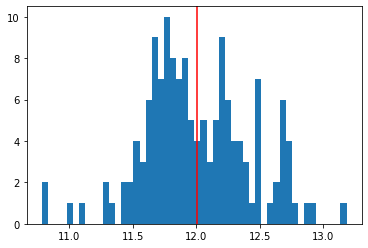

In [10]:
plt.hist(y_pred , bins=50)
plt.axvline(x = y_pred.mean(), color = 'r')

In [11]:
y_test_r = np.exp(y_test)
y_pred_r = np.exp(y_pred)


In [12]:
evaluation_metrics(y_test_r, y_pred_r)

R2 on test data: 0.89
MSE : 977267573.18
RMSE : 31261.28
MAE : 16382.79
MAPE : 0.08


In [13]:
# summarize feature importance
importance = reg.coef_
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()
importance

array([[ 0.05834998,  0.11081199,  0.04437349,  0.21223094,  0.47255694,
         0.32811259, -0.00945458,  0.01346424,  0.05053973,  0.10819279,
         0.06160609,  0.04754042,  0.04946057,  0.07935779,  0.3393071 ,
         0.98992402,  0.13012438,  0.06795982,  0.0620311 ,  0.10953589,
         0.05457352,  0.0166667 ,  0.16886791,  0.06240027,  0.03493224,
         0.0453929 ,  0.10529045]])

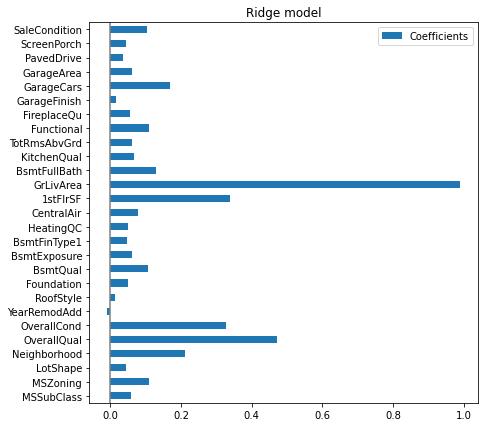

In [14]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
   reg.coef_[0],
   columns=['Coefficients'], index=X_train_lin.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

## Xgboost

In [15]:
from xgboost import XGBRegressor
gb_r = XGBRegressor()

In [16]:
gb_r.fit(X_train,y_train)
y_pred = gb_r.predict(X_test)

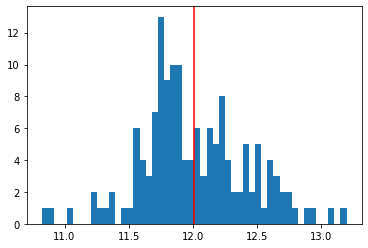

In [17]:
plt.hist(y_pred , bins=50)
plt.axvline(x = y_pred.mean(), color = 'r')

In [18]:
y_test_r = np.exp(y_test)
y_pred_r = np.exp(y_pred)

In [19]:
evaluation_metrics(y_test_r, y_pred_r)

R2 on test data: 0.89
MSE : 1036086559.06
RMSE : 32188.3
MAE : 17965.66
MAPE : 0.1


### Test_data 

In [20]:
df_id = pd.read_csv('raw_data/test.csv')
test_sub = pd.read_csv('Engineered_data/testsub.csv')

In [21]:
y_pred = np.round(np.exp(reg.predict(test_sub[selected_feats])), 0)

In [22]:
df_t = pd.DataFrame(data=y_pred, columns= ['price_pred'])
predicted_price = pd.concat([df_id.Id, df_t], axis=1)

In [23]:
predicted_price

,Id,price_pred
0,1461,114197.0
1,1462,151057.0
2,1463,174953.0
3,1464,193806.0
4,1465,214079.0
...,...,...
1454,2915,89394.0
1455,2916,81344.0
1456,2917,150342.0
1457,2918,119038.0


In [24]:
predicted_price.to_csv('predicted_price.csv')